In [1]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import optimize as opt

# Приближенное решение уравнения ${f(x) = 0}$ методом деления отрезка пополам 

## Описание метода

Для работы метода нам нужно знать отрезок [a, b], такой что выполняется теорема Больцано-Коши ($f(a) * f(b) < 0$). В таком случае на этом отрезке $\exists c: f(c) = 0, c \in (a, b)$. Мы будем строить последовательность отрезков $\{[a_n, b_n] : [a_n, b_n] \subset [a_{n-1}, b_{n-1}] \subset [a, b]\}$, на концах которой функция принимает значения разных знаков. На каждом шаге итерации мы вычисляем значение $\xi = \frac{a_n + b_n}{2}$ и значение функции $f(\xi)$ в этой точке. После мы проверяем является ли $\xi$ корнем нашего уравнения и если не является то мы добавляем в нашу последовательность отрезков один из отрезков $[a_n, \xi]$ или $[\xi, b_n]$ (выбираем из них тот на концах которого функция имеет разные знаки) 

Мне достался вариант 11, c функцией $f(x) = \frac{1 + \cos{x}}{3 - \sin{x}} - x$

In [2]:
f = lambda x: (1 + np.cos(x)) / (3 - np.sin(x)) - x

Строим график, чтобы визуально определить a и b из алгоритма 

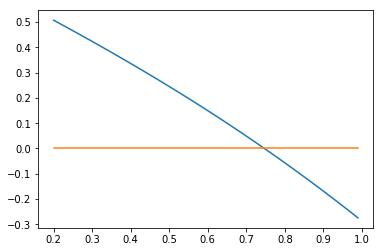

In [3]:
x = np.arange(0.2, 1, 0.01)
plt.plot(x, f(x), x, np.zeros(len(x)))
plt.show()

Сама функция реализующая алгоритм 

In [4]:
def bisect(f, a, b, eps):
    assert f(a) * f(b) < 0, 'f(a) * f(b) should be < 0'
    
    an = a
    bn = b
    k = 0
    while True:
        x0 = (an + bn) / 2
        k += 1
        if f(x0) == 0 or bn - an < 2 * eps:
            return {'root': x0, 'k': k} 
        
        if f(an) * f(x0) < 0:
            an = an
            bn = x0
        else:
            an = x0
            bn = bn

Вычисление корня $f(x)$

In [9]:
my_sol = bisect(f, 0.2, 1.0, 1e-6)
my_sol

{'root': 0.7471107482910155, 'k': 20}

Вычисление корня $f(x)$ аналогичным методом из библиотеки scipy (для проверки моего решения)

In [10]:
scipy_sol = opt.root_scalar(f, bracket=[0.1, 1.0], method='bisect').root
scipy_sol

0.7471111956581811

Насколько сильно мое решение отличается от решения scipy 

In [11]:
abs(scipy_sol - my_sol['root'])

4.473671655347289e-07

Для достижения данной точности метод сделал 20 итераций 

# Метод простых итераций решения уравнения $f(x) = 0$

In [13]:
f = lambda x: x - np.log(x - 1 + np.sqrt((x - 1) ** 2 + 1))
phi = lambda x: np.log(x - 1 + np.sqrt((x - 1) ** 2 + 1))

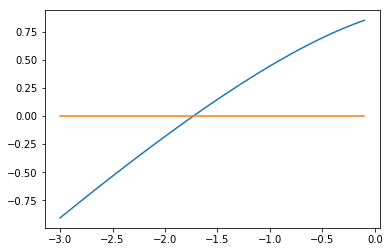

In [14]:
x = np.arange(-3, 0, 0.1)
plt.plot(x, f(x), x, np.zeros(len(x)))
plt.show()

In [26]:
def fixed_point_iter(f, x0, eps):
    x = x0
    k = 0
    while True:
        y = f(x)
        k += 1
        if abs(y - x) < eps:
            return {'root': y, 'k': k}
        else: 
            x = y


In [27]:
my_sol = fixed_point_iter(phi, -2, 1e-6)
my_sol

{'root': -1.7291171386629345, 'k': 13}

In [28]:
sc_sol = opt.root_scalar(f, method='brentq', bracket=[-3,0]).root
sc_sol

-1.729116898214366

In [29]:
abs(sc_sol - my_sol['root'])

2.404485683893398e-07

Для достижения данной точности метод сделал 13 итераций 

# Метод Ньютона

In [31]:
f = lambda x: x - np.log(x - 1 + np.sqrt((x - 1) ** 2 + 1))
f_prime = lambda x: 1 / np.sqrt((x - 1) ** 2 + 1)

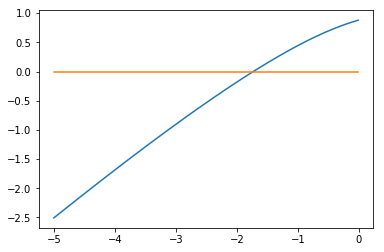

In [32]:
x = np.arange(-5, 0, 0.01)
plt.plot(x, f(x), x, np.zeros(len(x)))
plt.show()

In [36]:
def newton(f, fprime, x0, eps):
    xs = x0
    k = 0
    while True:
        y = f_prime(xs)
        xn = xs - f(xs) / y
        k += 1
        if abs(xn - xs) < eps:
            return {'root': xn, 'k': k}
        
        xs = xn
    
    

In [37]:
my_sol = newton(f, f_prime, -3, 1e-6)
my_sol

{'root': -1.7291164317332868, 'k': 131}

In [38]:
sc_sol = opt.root_scalar(f, method='brentq', bracket=[-3,0]).root
sc_sol

-1.729116898214366

In [39]:
abs(sc_sol - my_sol['root'])

4.6648107931979155e-07

Для достижения данной точности метод сделал 131 итерацию 

# Метод хорд и касательных 


In [41]:
f = lambda x: x - np.log(x - 1 + np.sqrt((x - 1) ** 2 + 1))

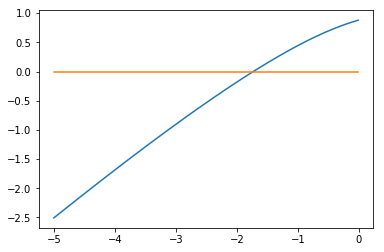

In [42]:
x = np.arange(-5, 0, 0.01)
plt.plot(x, f(x), x, np.zeros(len(x)))
plt.show()

In [43]:
def secant(f, x, eps):
    k = 0
    x, x_prev = x, 2 * x 
    while abs(x - x_prev) > eps:
        x, x_prev = x - f(x) / (f(x) - f(x_prev)) * (x - x_prev), x
        k += 1

        
    return {'root': x, 'k': k}

In [48]:
my_sol = secant(f, -2, 1e-6)
my_sol

{'root': -1.7291168982143734, 'k': 5}

In [49]:
sc_sol = opt.root_scalar(f, method='brentq', bracket=[-2,-1]).root
sc_sol

-1.729116898214374

In [50]:
abs(sc_sol - my_sol['root'])

6.661338147750939e-16

In [51]:
my_sol['k']

5

Для достижения данной точности метод сделал 5 итераций 

#  Сравнение и результаты 

Быстрее всех методов сходится метод хорд (за 5 итераций, когда остальным нужно > 20)